### This is an example impementing linear regression using popular Python libraries

Linear regression model is just a linear function of the input feature. 

More generally, a linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the intercept (bias) term.

To train a Linear Regression model, we need to set its parameters so that the model best fits the training set (minimize the cost function). 

The goal is to show the advantages of machine learning libraries in simplifying the implementation 

### Setup

In [3]:
# Common imports
import numpy as np
import pandas as pd
import sklearn.linear_model
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Let’s generate some linear-looking data

In [4]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

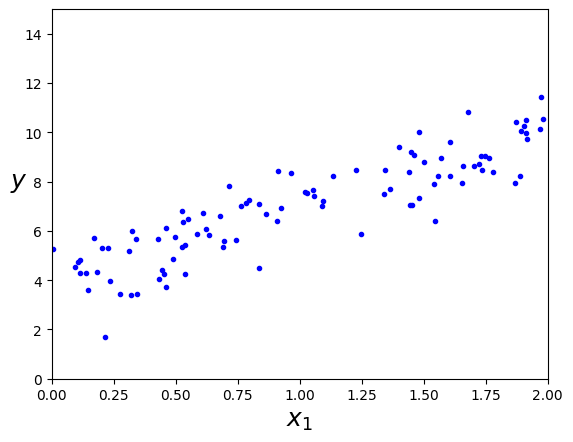

In [5]:
# visualize the dataset

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.1, random_state=0)

In [7]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (90, 1)
y_train shape: (90, 1)
X_test shape: (10, 1)
y_test shape: (10, 1)


### Linear regression using the NumPy library’s Linear Algebra module

To find the value of θ that minimizes the cost function, there is a closed-form solution (a mathematical equation) that gives the result directly. 

Normal Equation: 
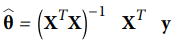



In [8]:
# solve the normal equation and find the estimated parameters that minimize the cost function
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(y_train)
theta_best

array([[4.01250376],
       [3.03251144]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of these values. 
Close enough, but the noise made it impossible to recover the exact parameters of the orignal function.

#### Now you can make predictions on the training data and visualize them

In [9]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # add x0 = 1 to each instance
y_predict_train = X_train_b.dot(theta_best)


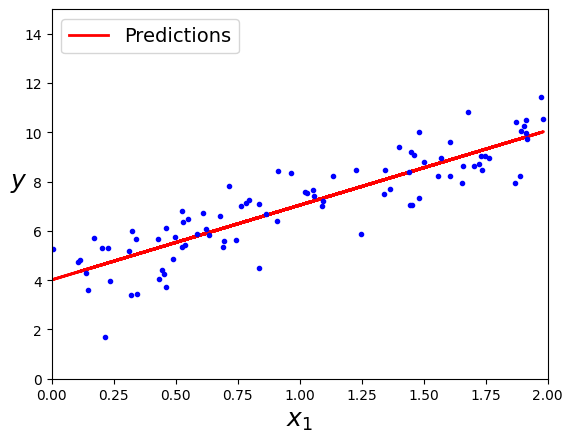

In [10]:
#plot this model’s predictions
plt.plot(X_train, y_predict_train, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

#### Now you can make predictions on the test data and visualize them

In [11]:
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # add x0 = 1 to each instance
y_predict = X_test_b.dot(theta_best)

In [12]:
y_predict

array([[4.56272346],
       [8.69007383],
       [9.9836889 ],
       [4.30033832],
       [4.85143921],
       [5.63861497],
       [8.7018544 ],
       [6.81170578],
       [4.35453424],
       [9.41229838]])

In [13]:
y_test

array([[ 4.34398643],
       [ 7.88606432],
       [10.117339  ],
       [ 4.55256849],
       [ 3.44766001],
       [ 4.2506048 ],
       [ 6.40155102],
       [ 6.93389522],
       [ 4.27197608],
       [ 8.40490448]])

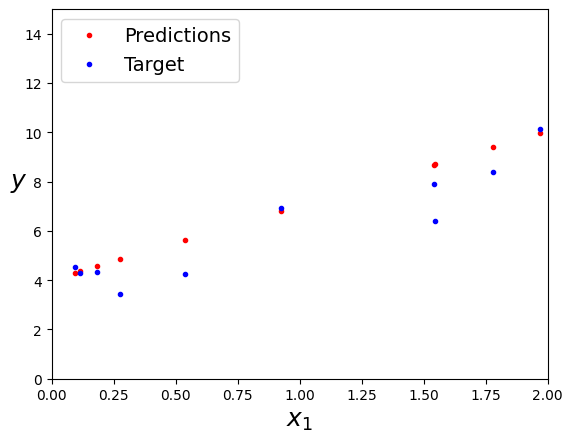

In [14]:
#plot this model’s predictions
plt.plot(X_test, y_predict, "r.", label="Predictions")
plt.plot(X_test, y_test, "b.", label="Target")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

#### Now let's calculate the RSS of the prediction

In [15]:
def RSS(y, y_hat):
    total_RSS = 0.
    for y_, y_hat_ in zip(y, y_hat):
        total_RSS+= (y_ - y_hat_)**2
    return total_RSS


In [16]:
print(RSS(y_test, y_predict))

[11.00091209]


### Linear regression using the scikit-learn machine learning library (quite simple!)

In [17]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# the estimated parameters
lin_reg.intercept_, lin_reg.coef_

(array([4.01250376]), array([[3.03251144]]))

Note: The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares” error). This function computes the pseudoinverse of X (specifically the Moore-Penrose inverse). 
The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD).  

#### Now you can make predictions and visualize them

In [18]:
y_predict_reg = lin_reg.predict(X_test)
y_predict_reg

array([[4.56272346],
       [8.69007383],
       [9.9836889 ],
       [4.30033832],
       [4.85143921],
       [5.63861497],
       [8.7018544 ],
       [6.81170578],
       [4.35453424],
       [9.41229838]])

In [19]:
print(RSS(y_test, y_predict_reg))

[11.00091209]
